In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# my data are load from this 2 dataset
#df2018 = pd.read_csv('201812-fordgobike-tripdata.csv')
#df2019 = pd.read_csv('201912-baywheels-tripdata.csv')

### What is the structure of your dataset?

> There are 131363 entries in 2018's data and 150102 in 2019's data. The start and end station name are being recorded per customer for the particular trip. There are only 2 types of user type for the records. The dateTime also being recored per particular trip.

### What is/are the main feature(s) of interest in your dataset?

> I am interested to know which station having higher demand on bike renting and which are the station where the user usually stop at. Also, i would like to know the data by different period of time in a day, i.e. morning, afternoon and evening. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> When i scan through the data via excel spreadsheet, i found that most of the time are fall on evening. The stations name are hard to predict. I will expect that the request is having higher peak during evening, therefore, it shall be sufficient if we prepare more bikes on the stations with higher request before evening.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest : start stations and the time for the rental start.

I continue the same filtering for the rest of the dataset, so that I can have 10 stations to focus on per time period for 2018 and 2019.

repeat the same for 2019's data

In [3]:
# retrieve for from database to fasten the process
dfClean = pd.read_csv('dfClean.csv') 

In [4]:
# check data
dfClean

,Unnamed: 0,start_station_name,StartAt,Year,Count
0,70,21st Ave at International Blvd,Morning,2018,2
1,667,Oak St at 1st St,Morning,2018,2
2,211,Almaden Blvd at San Fernando St,Morning,2018,2
3,375,Farnam St at Fruitvale Ave,Morning,2018,2
4,208,Almaden Blvd at Balbach St,Morning,2018,2
5,235,Berry St at 4th St,Morning,2018,902
6,575,Market St at 10th St,Morning,2018,928
7,763,San Francisco Ferry Building (Harry Bridges Pl...,Morning,2018,1043
8,754,San Francisco Caltrain (Townsend St at 4th St),Morning,2018,1161
9,757,San Francisco Caltrain Station 2 (Townsend St...,Morning,2018,1743


In [5]:
dfGrouped = dfClean.groupby(['start_station_name','StartAt'], as_index=False)['Count'].sum().sort_values(['Count'])
dfGrouped

,start_station_name,StartAt,Count
0,17th St at Santa Clara St,Afternoon,1
37,Parkmoor Ave at Race St,Morning,1
36,Park Ave at Race St,Evening,1
35,Park Ave at Laurel Grove Ln,Evening,1
34,Palm St at Willow St,Evening,1
31,Oak St at 1st St,Evening,1
29,Newhall St at 3rd St,Evening,1
26,Mercado Way at Sierra Rd,Afternoon,1
49,Williams Ave at 3rd St,Evening,1
21,Kerley Dr at Rosemary St,Morning,1


In [6]:
# Let's group by the stations name to produce a table to ease the reading
dfGrouped.sort_values(['Count','start_station_name'])

,start_station_name,StartAt,Count
0,17th St at Santa Clara St,Afternoon,1
2,1st St at Younger Ave,Morning,1
3,21st Ave at International Blvd,Afternoon,1
7,5th St at Taylor St,Afternoon,1
10,Asbury St at The Alameda,Evening,1
14,Columbia Ave at Bird Ave,Morning,1
15,Evans Ave at Mendell St,Morning,1
18,Foothill Blvd at Harrington Ave,Evening,1
20,Jackson St at N 1st St,Afternoon,1
21,Kerley Dr at Rosemary St,Morning,1


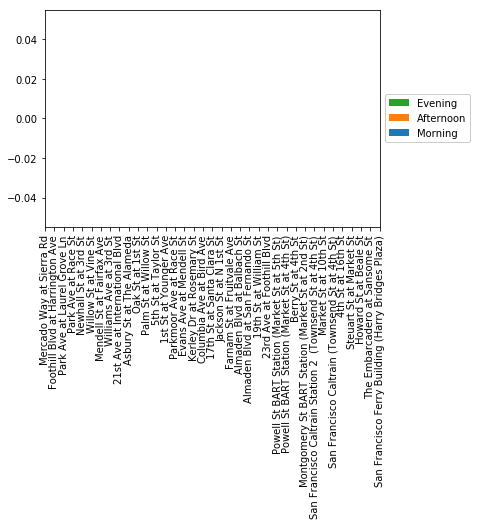

In [7]:
cat1_order = dfClean.sort_values('Count')['start_station_name'].unique()
cat2_order = ['Morning','Afternoon','Evening']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = dfClean.groupby('start_station_name')['Count'].sum() 

#dfClean.groupby('start_station_name', as_index=False).agg({"Count": "sum"})

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = dfClean[dfClean['StartAt'] == cat2]['Count']
    inner_props = inner_counts / cat1_counts[1]
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order, rotation = 90)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);


KeyError: 'None of [[2018, 2019]] are in the [index]'

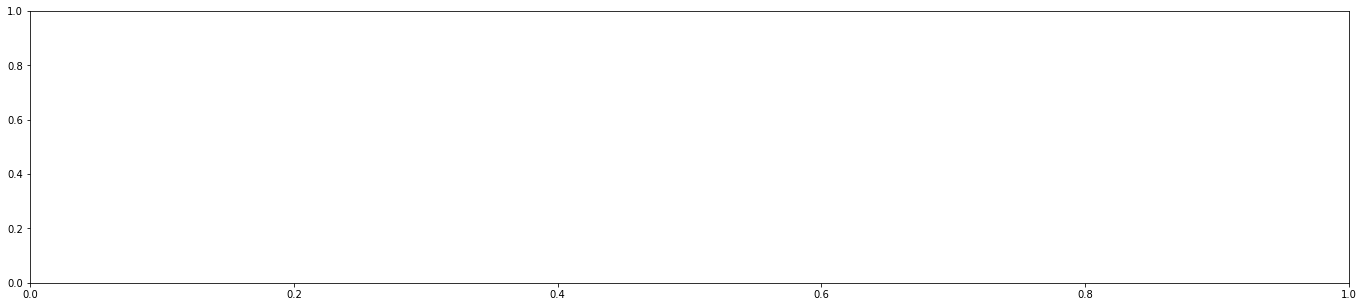

In [8]:
cat1_order = [2018, 2019]
cat2_order = ['Morning','Afternoon','Evening']

plt.figure(figsize = [52, 5])

# stacked bar chart, absolute counts
plt.subplot(1, 2, 1)

baselines = np.zeros(len(cat1_order))

# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat1 = cat1_order[i]
    cat2 = cat2_order[i]
    inner_counts = dfClean[(dfClean['StartAt'] == cat2) & (dfClean['Year'] == cat1)]['Count']
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order], bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order, rotation = 90)
plt.legend(cat2_order)

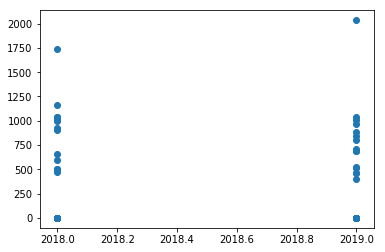

In [9]:
df = pd.DataFrame(dfClean, columns=['Year','Count'])
order = [2018, 2019]
df['Year'] = pd.Categorical(df['Year'], order)
df.sort_values(by=['Year'], inplace=True)
plt.scatter(df['Year'], df['Count'])

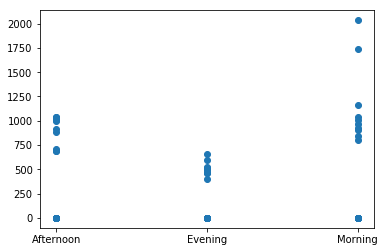

In [10]:
df = pd.DataFrame(dfClean, columns=['StartAt','Count'])
order = ['Morning', 'Afternoon', 'Evening']
df['StartAt'] = pd.Categorical(df['StartAt'], order)
df.sort_values(by=['StartAt'], inplace=True)
plt.scatter(df['StartAt'], df['Count'])

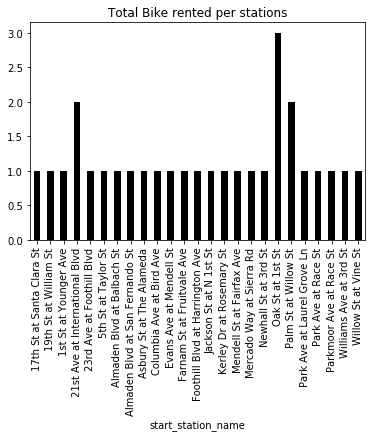

In [11]:
dfClean[dfClean['Count']< 10].groupby('start_station_name')['Count'].nunique().plot(kind='bar', color = 'Black', title ='Total Bike rented per stations')

I am trying to set the size of the bin, because currently it is showing 1.0,1.5 and etc just like the aboved graph

AttributeError: Unknown property bin

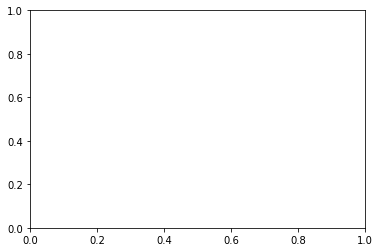

In [12]:
dfClean[dfClean['Count']< 10].groupby('start_station_name')['Count'].nunique().plot(kind='bar', color = 'Black', bin=[1,2,3])

This is obviously not correct because the data should be more than 100

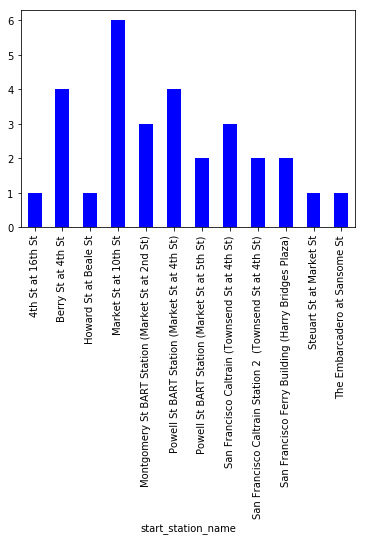

In [13]:
dfClean[dfClean['Count']> 10].groupby('start_station_name')['Count'].nunique().plot(kind='bar', color = 'Blue')